### TASK 1

- ### Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Bantuan_Sosial.xlsx')

In [3]:
df.head()

,No,Wilayah Kota,Kecamatan,Kelurahan,RW,Penerima (KK),Jadwal Distribusi,Tanggal Distribusi,Sembako
0,1,JAKARTA UTARA,Penjaringan,Penjaringan,RW 01,561.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
1,2,JAKARTA UTARA,Penjaringan,Penjaringan,RW 02,529.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
2,3,JAKARTA UTARA,Penjaringan,Penjaringan,RW 03,881.0,2020-04-09,2020-04-10,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
3,4,JAKARTA UTARA,Penjaringan,Penjaringan,RW 04,369.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
4,5,JAKARTA UTARA,Penjaringan,Penjaringan,RW 05,244.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  2693 non-null   int64         
 1   Wilayah Kota        2693 non-null   object        
 2   Kecamatan           2693 non-null   object        
 3   Kelurahan           2693 non-null   object        
 4   RW                  2693 non-null   object        
 5   Penerima (KK)       2693 non-null   float64       
 6   Jadwal Distribusi   2692 non-null   datetime64[ns]
 7   Tanggal Distribusi  2524 non-null   datetime64[ns]
 8   Sembako             2693 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 189.5+ KB


In [5]:
df.isna().sum()

No                      0
Wilayah Kota            0
Kecamatan               0
Kelurahan               0
RW                      0
Penerima (KK)           0
Jadwal Distribusi       1
Tanggal Distribusi    169
Sembako                 0
dtype: int64

- ### Data Cleansing

### Column Jadwal Distribusi

In [6]:
# Mengisi nilai yang hilang dalam kolom Jadwal Distribusi
df['Jadwal Distribusi'].fillna('2020-01-01', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  2693 non-null   int64         
 1   Wilayah Kota        2693 non-null   object        
 2   Kecamatan           2693 non-null   object        
 3   Kelurahan           2693 non-null   object        
 4   RW                  2693 non-null   object        
 5   Penerima (KK)       2693 non-null   float64       
 6   Jadwal Distribusi   2693 non-null   datetime64[ns]
 7   Tanggal Distribusi  2524 non-null   datetime64[ns]
 8   Sembako             2693 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 189.5+ KB


### Column Tanggal Distribusi

In [8]:
# Mengisi nilai yang hilang dalam kolom Tanggal Distribusi
df['Tanggal Distribusi'].fillna('2020-01-01', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  2693 non-null   int64         
 1   Wilayah Kota        2693 non-null   object        
 2   Kecamatan           2693 non-null   object        
 3   Kelurahan           2693 non-null   object        
 4   RW                  2693 non-null   object        
 5   Penerima (KK)       2693 non-null   float64       
 6   Jadwal Distribusi   2693 non-null   datetime64[ns]
 7   Tanggal Distribusi  2693 non-null   datetime64[ns]
 8   Sembako             2693 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 189.5+ KB


- ### EDA

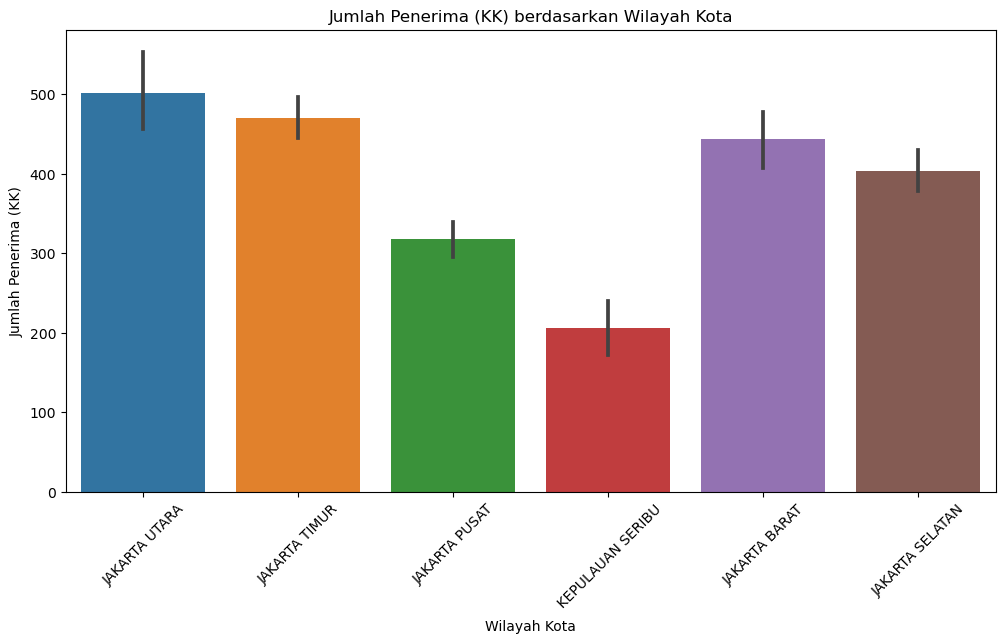

In [12]:
# Visualisasi jumlah penerima (KK) berdasarkan wilayah kota
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Wilayah Kota', y='Penerima (KK)')
plt.title('Jumlah Penerima (KK) berdasarkan Wilayah Kota')
plt.xlabel('Wilayah Kota')
plt.ylabel('Jumlah Penerima (KK)')
plt.xticks(rotation=45)
plt.show()

From the data above, we can see a comparison of the number of recipients (KK) in various city regions. So it can be seen that the city area that has the highest number of recipients of assistance, namely 43%, is North Jakarta and the lowest recipient area is Thousand Islands as much as 17% of the total recipients (KK) as a whole.

## Rabu, 25 Oktober 2023

### TASK 2

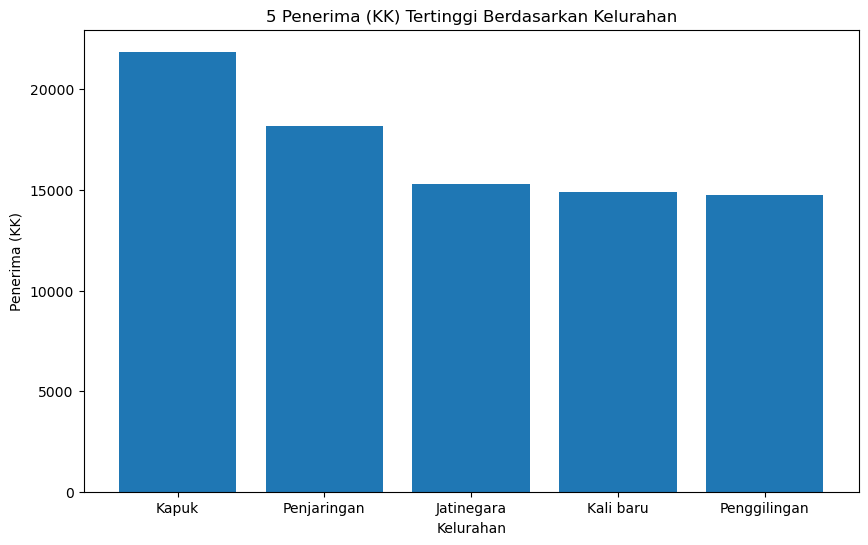

In [25]:
# Mengelompokkan data berdasarkan kelurahan dan menghitung total
grouped_data = df.groupby('Kelurahan')['Penerima (KK)'].sum().reset_index()

# Mengurutkan data berdasarkan total penerima dalam urutan menurun
sorted_data = grouped_data.sort_values(by='Penerima (KK)', ascending=False)

# Mengambil 5 kelurahan tertinggi
top_5_kelurahan = sorted_data.head(5)

# Menampilkan visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5_kelurahan['Kelurahan'], top_5_kelurahan['Penerima (KK)'])
plt.xlabel('Kelurahan')
plt.ylabel('Penerima (KK)')
plt.title('5 Penerima (KK) Tertinggi Berdasarkan Kelurahan')
plt.show()

Based on the data above, it is known that there are 5 kelurahan with the highest number of recipients (KK), namely Kelurahan Kapuk with 18% of the total recipients (KK) by kelurahan. This is likely because Kelurahan Kapuk is the most densely populated of all the kelurahan in Jakarta.

In [14]:
# Mengelompokkan data berdasarkan kelurahan dan menghitung total penerima bantuan
total_per_kelurahan = df.groupby('Kelurahan')['Penerima (KK)'].sum().reset_index()

# Memilih kelurahan tertentu
kelurahan_tertentu = 'Kapuk'
total_konkret = total_per_kelurahan[total_per_kelurahan['Kelurahan'] == kelurahan_tertentu]

# Menampilkan total penerima bantuan untuk kelurahan tertentu
print("Total Penerima Bantuan untuk Kelurahan", kelurahan_tertentu, ":", total_konkret['Penerima (KK)'].values[0])

Total Penerima Bantuan untuk Kelurahan Kapuk : 21869.0


In [15]:
# Menghitung total penerima bantuan secara keseluruhan
total_keseluruhan = df['Penerima (KK)'].sum()

# Menampilkan total penerima bantuan secara keseluruhan
print("Total Penerima Bantuan Keseluruhan:", total_keseluruhan)

Total Penerima Bantuan Keseluruhan: 1160409.0


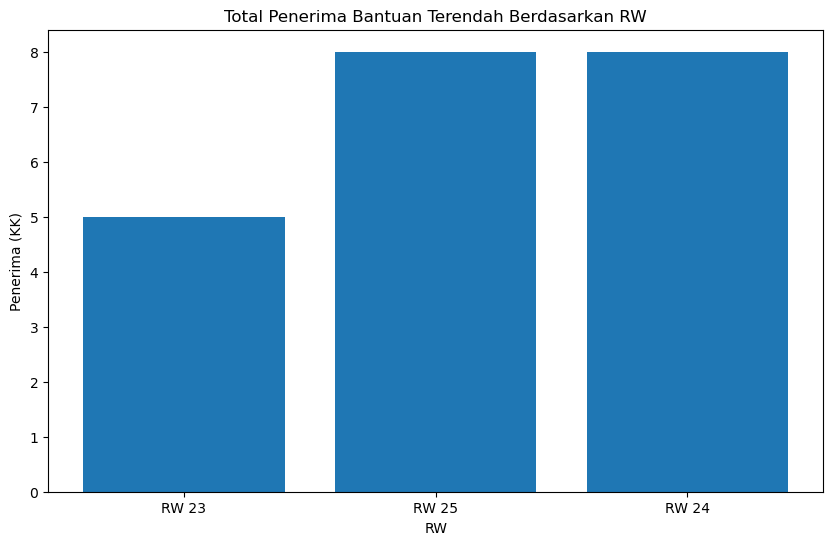

In [16]:
# Visualisasi jumlah penerima (KK) terendah berdasarkan RW

# Mengelompokkan data berdasarkan RW dan menghitung total
grouped_data = df.groupby('RW')['Penerima (KK)'].sum().reset_index()

# Mengurutkan data berdasarkan total penerima dalam urutan menurun
sorted_data = grouped_data.sort_values(by='Penerima (KK)', ascending=True)

# Mengambil 3 RW penerima terendah
low_3_rw = sorted_data.head(3)

# Menampilkan visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(low_3_rw['RW'], low_3_rw['Penerima (KK)'])
plt.xlabel('RW')
plt.ylabel('Penerima (KK)')
plt.title('Total Penerima Bantuan Terendah Berdasarkan RW')
plt.show()

In [17]:
# Mengelompokkan data berdasarkan rw dan menghitung total penerima bantuan
total_per_rw = df.groupby('RW')['Penerima (KK)'].sum().reset_index()

# Memilih rw tertentu
rw_tertentu = 'RW 23'
total_konkret = total_per_rw[total_per_rw['RW'] == rw_tertentu]

# Menampilkan total penerima bantuan untuk rw tertentu
print("Total Penerima Bantuan untuk", rw_tertentu, ":", total_konkret['Penerima (KK)'].values[0])

Total Penerima Bantuan untuk RW 23 : 5.0


Based on the data above, it can be seen that the lowest number of recipients by RW is RW 23 with 0.43%, while RW 24 and RW 25 have the same number of recipients at 0.68% of the total number of recipients (KK).

### TASK 3

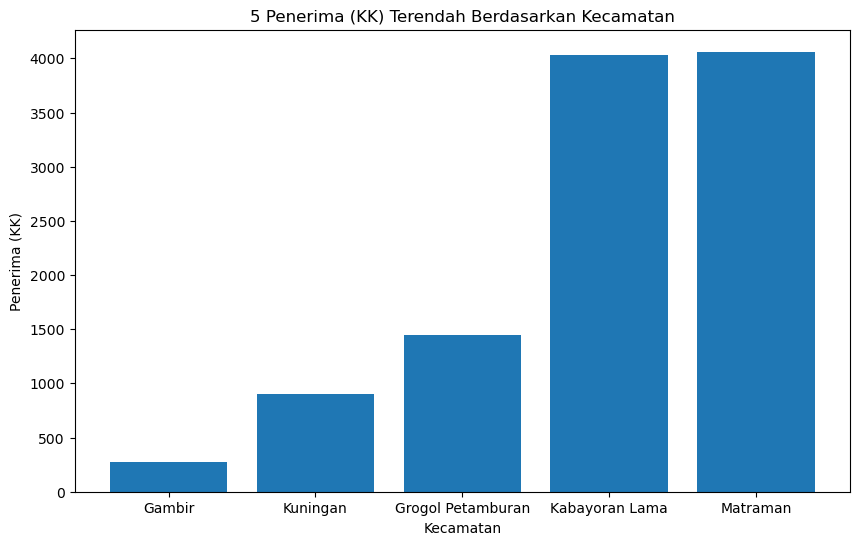

In [32]:
# Mengelompokkan data berdasarkan kecamatan dan menghitung total
grouped_data = df.groupby('Kecamatan')['Penerima (KK)'].sum().reset_index()

# Mengurutkan data berdasarkan total penerima dalam urutan naik
sorted_data = grouped_data.sort_values(by='Penerima (KK)', ascending=True)

# Mengambil 5 kecamatan terendah
low_5_kecamatan = sorted_data.head(5)

# Menampilkan visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(low_5_kecamatan['Kecamatan'], low_5_kecamatan['Penerima (KK)'])
plt.xlabel('Kecamatan')
plt.ylabel('Penerima (KK)')
plt.title('5 Penerima (KK) Terendah Berdasarkan Kecamatan')
plt.show()

Based on the data above, it is known that there are 5 kecamatan with the lowest number of recipients (KK), namely Kecamatan Gambir (2.3%) calculated from the total recipients (KK) by kecamatan. The possible cause is that the government has not yet provided comprehensive assistance because the data collection has not yet been completed and submitted to the responsible party.

### TASK 1

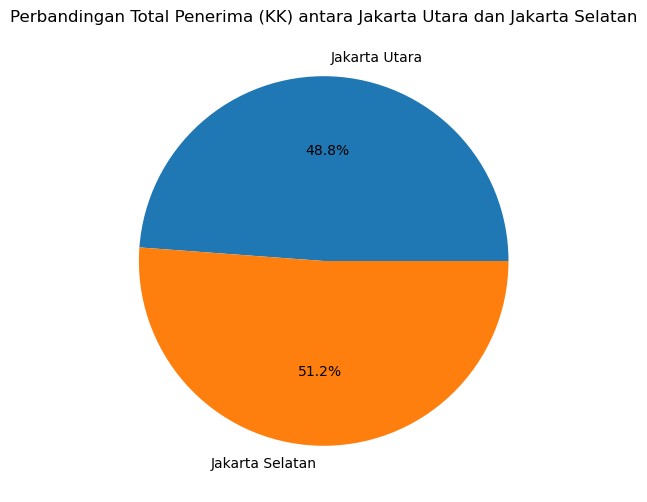

In [19]:
# Filter data untuk wilayah Jakarta Utara dan Jakarta Selatan
jakarta_utara = df[df['Wilayah Kota'] == 'JAKARTA UTARA']
jakarta_selatan = df[df['Wilayah Kota'] == 'JAKARTA SELATAN']

# Hitung total penerima (KK) untuk kedua wilayah
total_utara = jakarta_utara['Penerima (KK)'].sum()
total_selatan = jakarta_selatan['Penerima (KK)'].sum()

# Pie Chart untuk melakukan perbandingan
plt.figure(figsize=(6, 6))
plt.pie([total_utara, total_selatan], labels=['Jakarta Utara', 'Jakarta Selatan'], autopct='%1.1f%%')
plt.title('Perbandingan Total Penerima (KK) antara Jakarta Utara dan Jakarta Selatan')
plt.show()

From the data above, the recipients of assistance (KK) between the two regions, namely North Jakarta and South Jakarta. Shows the percentage comparison of the total beneficiaries (KK) in the two regions.
From this visualization, we can see that South Jakarta is larger, meaning that South Jakarta has more beneficiaries (KK) at 51.2% of the total beneficiaries (KK) than North Jakarta.

In [26]:
# menghitung total distribusi sembako per jenis
sembako_distribution = df['Sembako'].str.split(', ').explode()

# Menghitung total distribusi sembako per jenis
total_sembako_per_jenis = sembako_distribution.value_counts()

print(total_sembako_per_jenis)

beras 5kg           2693
biskuit 2 pc        2693
masker 2pc          2693
sabun 2pc           2693
minyak 0,9l / 1L    2693
sarden 2 kaleng     2693
Name: Sembako, dtype: int64


In [27]:
# Menghitung total penerima (KK) per wilayah kota
total_per_wilayah = df.groupby('Wilayah Kota')['Penerima (KK)'].sum()

# Mengurutkan wilayah berdasarkan total penerima (KK)
total_per_wilayah = total_per_wilayah.sort_values(ascending=False)

print(total_per_wilayah)

Wilayah Kota
JAKARTA TIMUR        326772.0
JAKARTA BARAT        258828.0
JAKARTA SELATAN      229198.0
JAKARTA UTARA        218705.0
JAKARTA PUSAT        121968.0
 KEPULAUAN SERIBU      4938.0
Name: Penerima (KK), dtype: float64


In [28]:
# Menghitung total penerima (KK) per kelurahan
total_per_kelurahan = df.groupby('Kelurahan')['Penerima (KK)'].sum()

# Mengurutkan total penerima (KK) per kelurahan
total_per_kelurahan = total_per_kelurahan.sort_values(ascending=False)

print(total_per_kelurahan)

Kelurahan
Kapuk             21869.0
Penjaringan       18186.0
Jatinegara        15291.0
Kali baru         14905.0
Penggilingan      14768.0
                   ...   
Senayan             175.0
Karet Semanggi      172.0
Selong              139.0
Gondangdia           44.0
Melawai              27.0
Name: Penerima (KK), Length: 267, dtype: float64


In [33]:
# Menghitung total penerima (KK) per kecamatan
total_per_kecamatan = df.groupby('Kecamatan')['Penerima (KK)'].sum()

# Mengurutkan total penerima (KK) per kecamatan
total_per_kecamatan = total_per_kecamatan.sort_values(ascending=False)

print(total_per_kecamatan)

Kecamatan
Kramat Jati           73394.0
Cakung                67000.0
Cengkareng            65802.0
Cilincing             64482.0
Kalideres             53252.0
Koja                  50306.0
Jatinegara            46634.0
Tanjung Priok         41201.0
Pasar Minggu          39169.0
Ciracas               38747.0
Grogol                37297.0
Jagakarsa             35232.0
Duren Sawit           33719.0
Kebon Jeruk           33574.0
Kembangan             27900.0
Tambora               27622.0
Cipayung              27617.0
Penjaringan           26684.0
Tebet                 26497.0
Kebayoran Lama        25459.0
Pesanggrahan          24081.0
Pasar Rebo            22641.0
Pulogadung            22469.0
Menteng               20353.0
Pademangan            19724.0
Johar Baru            15797.0
Cilandak              15363.0
Makasar               14715.0
Kebayoran Baru        13999.0
Pulo Gadung           13960.0
Palmerah              13783.0
Pancoran              12068.0
Mampang Prapatan      11708.0
